# Results for TENCON 2024 paper
## Experiment 3: Effect of Target Density

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Box Plots with Error Bars for Effect of Target Density

                                    count      mean       std       min  \
Algorithm              Target Size                                        
Brownian Motion        1            189.0  7.795451  2.253525  2.884259   
                       10           210.0  1.169429  0.538101  0.454416   
                       20           200.0  0.803017  0.422495  0.227273   
Correlated Random Walk 1            180.0  2.588942  1.581606  1.179275   
                       10           180.0  0.800933  0.682456  0.121291   
                       20           200.0  0.769417  0.510765  0.081360   
Levy Flight            1            128.0  2.580983  2.181653  0.728082   
                       10           110.0  0.775775  0.679635  0.126760   
                       20           110.0  0.606520  0.235314  0.157328   
Random Walk            1            100.0  1.630799  1.047127  0.600109   
                       10           100.0  0.524188  0.236257  0.090909   
                       20

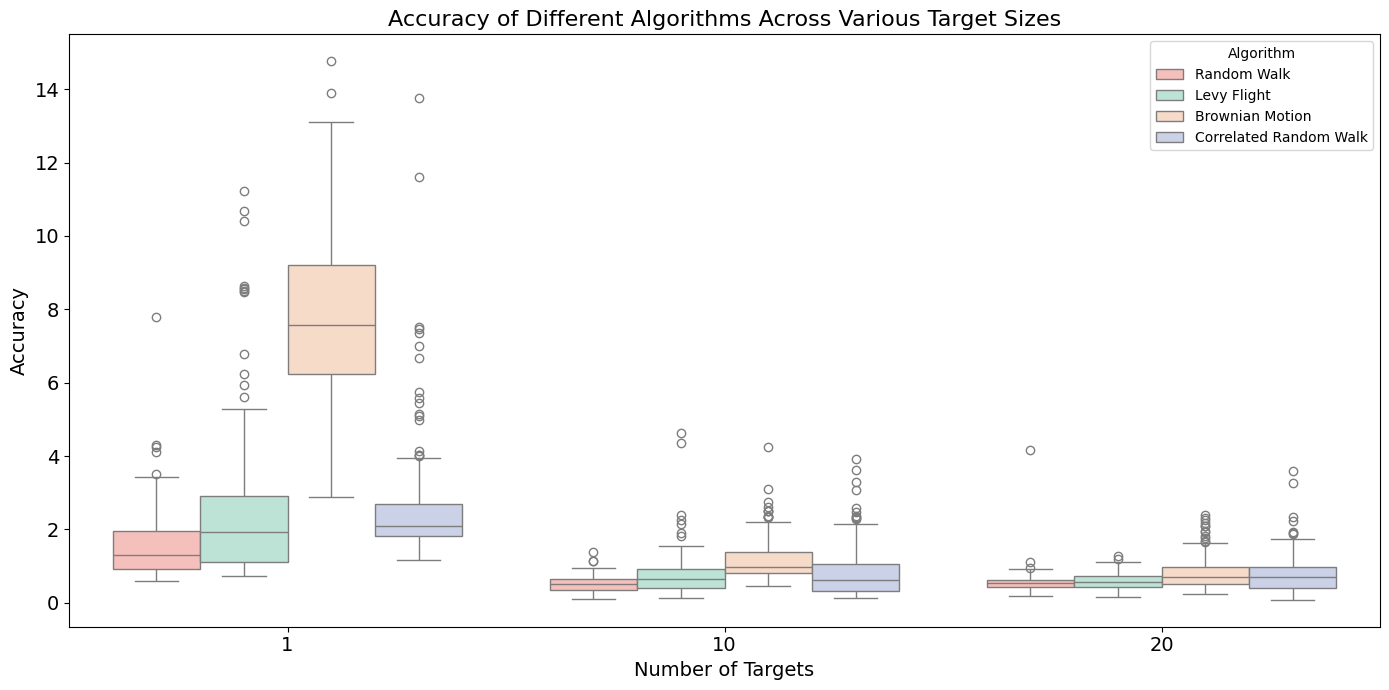

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} does not exist. Skipping.")
        return accuracies

    # Find all subdirectories in the base directory
    sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for sub_dir in sub_dirs:
        # Find all files that match the pattern e-puck*.csv in each subdirectory
        csv_files = glob.glob(os.path.join(sub_dir, 'e-puck*.csv'))
        
        # Debug print to check if files are being found
        # print(f"Found {len(csv_files)} files in {sub_dir}")

        for run_path in csv_files:
            if os.path.isfile(run_path):
                try:
                    if skip_lines:
                        df = pd.read_csv(run_path, skip_blank_lines=True)
                    else:
                        df = pd.read_csv(run_path)

                    final_average_count = df['average_count'].iloc[-1]
                    accuracy = final_average_count / actual_black_tiles
                    accuracies.append({
                        "directory": sub_dir,
                        "file": run_path,
                        "accuracy": accuracy
                    })
                except Exception as e:
                    print(f"Error reading {run_path}: {e}")
    
    return accuracies

# Directories for each algorithm and target size
algorithms = ["Random Walk", "Levy Flight", "Brownian Motion", "Correlated Random Walk"]
target_sizes = [1, 10, 20]
base_dirs = {
    "Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets"
    },
    "Levy Flight": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets"
    },
    "Brownian Motion": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets"
    },
    "Correlated Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
    }
}

# Actual number of black tiles
actual_black_tiles = {1: 1, 10: 10, 20: 20}

# Collect accuracy data
data = []

for algorithm in algorithms:
    for target_size in target_sizes:
        if target_size in base_dirs[algorithm]:
            dir_path = base_dirs[algorithm][target_size]
            accuracy_data = read_accuracy_data(dir_path, actual_black_tiles[target_size], skip_lines=(algorithm in ["Random Walk", "Levy Flight"]))
            for entry in accuracy_data:
                data.append({
                    "Algorithm": algorithm,
                    "Target Size": target_size,
                    "Accuracy": entry['accuracy'],
                    "Directory": entry['directory'],
                    "File": entry['file']
                })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Print descriptive statistics
descriptive_stats = df.groupby(['Algorithm', 'Target Size'])['Accuracy'].describe()
print(descriptive_stats)

# Identify and print outliers
outliers = df[df['Accuracy'] > 15]
print("\nOutliers with Accuracy > 15:")

# Set pandas options to display the full content
pd.set_option('display.max_colwidth', None)

print(outliers)

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the accuracies using box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Target Size', y='Accuracy', hue='Algorithm', data=df, palette=pastel_palette)

# Adding labels and title
plt.title('Accuracy of Different Algorithms Across Various Target Sizes', fontsize=16)
plt.xlabel('Number of Targets', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Algorithm', fontsize=10, loc='upper right')
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

# Save the figure
plt.savefig('/home/herzon/results-thesis/subthesis-3/final_plots/3_results.png', format='png', dpi=1200)

plt.show()
